In [7]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import numpy as np
import pandas as pd
from genealogy_aligner import Pedigree
import matplotlib.pyplot as plt
from genealogy_aligner.Aligner import DescMatchingAligner
import msprime as msp
import io
from IPython.display import SVG, display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
print("Simulating from a random pedigree...")
ped = Pedigree.simulate_from_founders(40, 40, 2, 1)
probands = ped.probands(use_time=False)
sim = ped.generate_msprime_simulations(model_after=None)

Simulating from a random pedigree...


In [14]:
ts = sim[0]

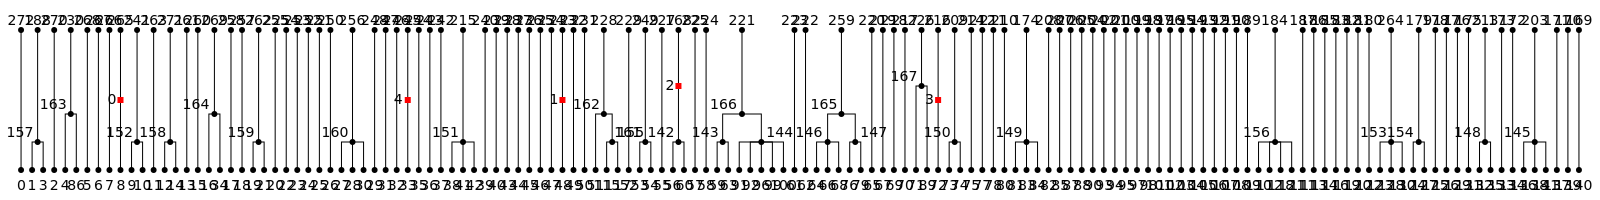

Tree 0 covers [0.00, 1000000.00)


In [15]:
for tree in ts.trees():
    display(SVG(tree.draw(width = 1600, height = 200)))
    plt.show()
    plt.close()
    coalescent = []
    coalescent_gen = []
    print("Tree {} covers [{:.2f}, {:.2f})".format(
            tree.index, *tree.interval)
        )

In [16]:
times = []
for tree in ts.trees():
    allTimes = []
    info = {}
    for node1 in tree.nodes(order="postorder"):
            allTimes.append(tree.time(node1))
    for t in np.unique(allTimes):
        info[t]=0
    times.append(info)
print(times)

[{0.0: 0, 1.0: 0, 2.0: 0, 3.0: 0, 5.0: 0}]


{0.0: 98, 1.0: 4, 2.0: 0, 3.0: 0, 5.0: 0}
26


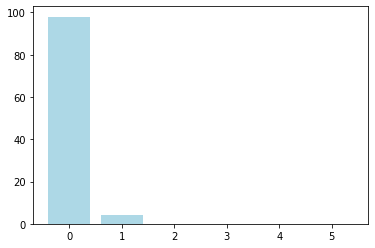

[array([142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167])]


In [17]:
l = []
for tree in ts.trees():
    lst = []           
    for node1 in tree.nodes(order="postorder"):
        for node2 in tree.nodes(order="postorder"):
            if ((node1 != node2)& (tree.parent(node1) == tree.parent(node2)) & (tree.parent(node1) != -1)):
                if (tree.time(node1) == tree.time(node2)):
                    times[tree.index][tree.time(node1)] = times[tree.index][tree.time(node1)]+1
                lst.append(tree.parent(node1))
                coalEvents = np.unique(lst)
    l.append(coalEvents)
    print(times[tree.index])
    print(coalEvents.size)
    plt.bar(times[tree.index].keys(), times[tree.index].values(), color='lightblue')
    plt.show()
print(l)